In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
dim_noise = 100;
n_sample = 1000;

In [3]:
def linear(n_sample=1000):
    t = np.linspace(0, 1, n_sample)
    data = np.c_[4*t, 6*t, 9*t]
    return data

def helix(n_sample=1000):
    t = np.linspace(2*np.pi, 9*np.pi, n_sample)
    data = np.c_[t*np.cos(t), t*np.sin(t), t]
    return data

def sphere(n_sample=1000):
    data = []
    offset = 2.0/n_sample
    increment = np.pi*(3.0-np.sqrt(5))
    for i in range(n_sample):
        y = i*offset+offset/2-1
        r = np.sqrt(1-y**2)
        phi = (i+1)*increment
        x = np.cos(phi) * r
        z = np.sin(phi) * r
        data.append([x, y, z])
    return 9*np.array(data)

def Guassian_mixture(n_sample=1000):
    data = make_blobs(
        centers=[[-3, -3, -3], [0, 0, 0], [3, 3, 3]],
        cluster_std=[0.3, 0.3, 0.4],
        random_state=0, n_samples=n_sample, n_features=3)[0]
    return data

In [4]:
def sphere(n_sample=1000):
    data = np.zeros([1000, 3])
    u = np.linspace(0, 2*np.pi, 40)
    v = np.linspace(0, np.pi, 25)
    for i in range(25):
        for j in range(40): 
            x = 9*np.cos(u[j])*np.sin(v[i])
            y = 9*np.sin(u[j])*np.sin(v[i])
            z = 9*np.cos(v[i])
            sample = [x, y, z]
            data[i*40+j] = sample
    return data

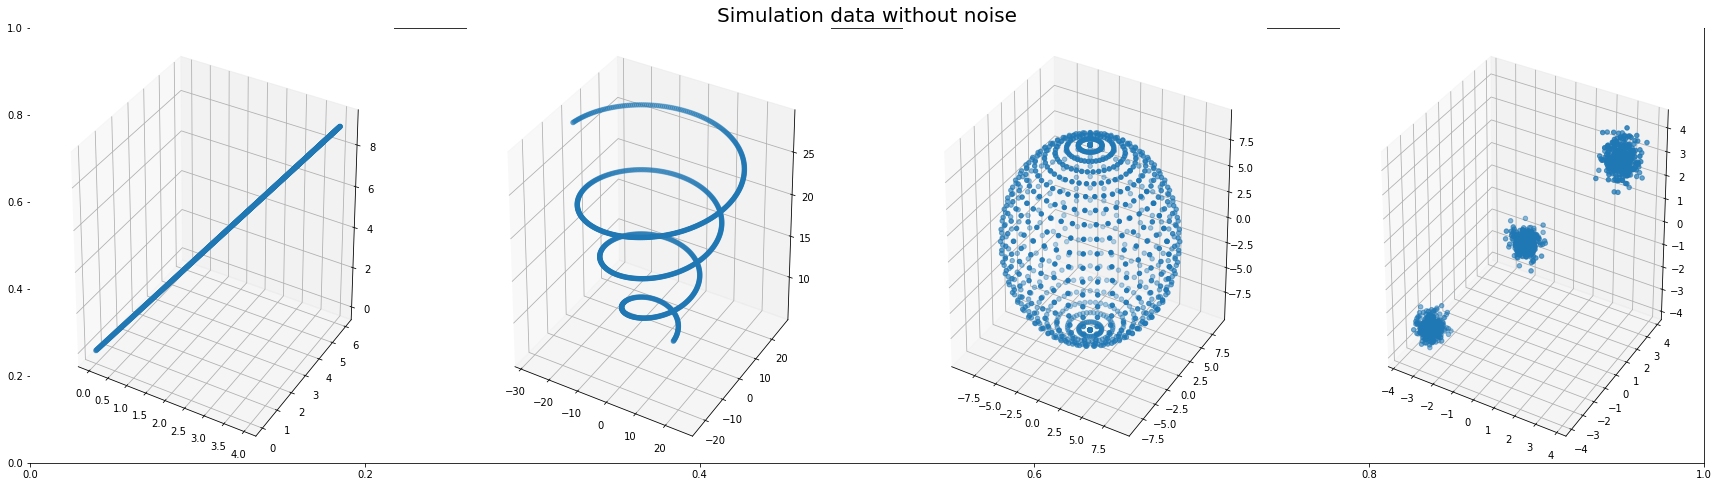

In [5]:
data = [(linear(), ['linear']), (helix(), ['helix']), (sphere(), ['sphere']), (Guassian_mixture(), ['Guassian mixture'])]

fig = plt.figure(figsize=(30, 8))
plt.title('Simulation data without noise', fontsize=20)

for i, (samples, sim_title) in enumerate(data):
    
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    
    ax.scatter3D(samples[:, 0], samples[:, 1], samples[:, 2])

In [6]:
noise = make_blobs(n_samples=n_sample, centers=1, 
                   n_features=dim_noise, cluster_std=1, center_box=(0.0, 0.0))[0]